# E-Commerce – EDA – Python Project

### Import libraries

In [635]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [636]:
Data = pd.read_csv('C:\\Users\\Sasi\\Desktop\\data science\\Python\\Project 2\\Ecommerce - UK Retailer.csv', encoding= 'unicode_escape')

### Understanding the Data

In [637]:
Data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

### Numerical columns

In [638]:
numeric = Data.select_dtypes(include = np.number)
numeric

Quantity  UnitPrice  CustomerID
0              6       2.55     17850.0
1              6       3.39     17850.0
2              8       2.75     17850.0
3              6       3.39     17850.0
4              6       3.39     17850.0
...          ...        ...         ...
541904        12       0.85     12680.0
541905         6       2.10     12680.0
541906         4       4.15     12680.0
541907         4       4.15     12680.0
541908         3       4.95     12680.0

[541909 rows x 3 columns]

### Boxplot – All Numeric Variables

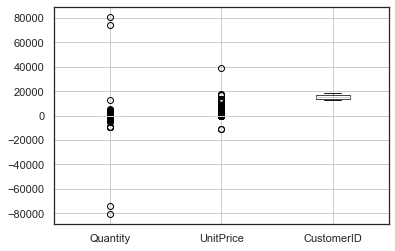

In [639]:
numeric.boxplot()
plt.show()

### Distribution Plot – All Numeric Variables

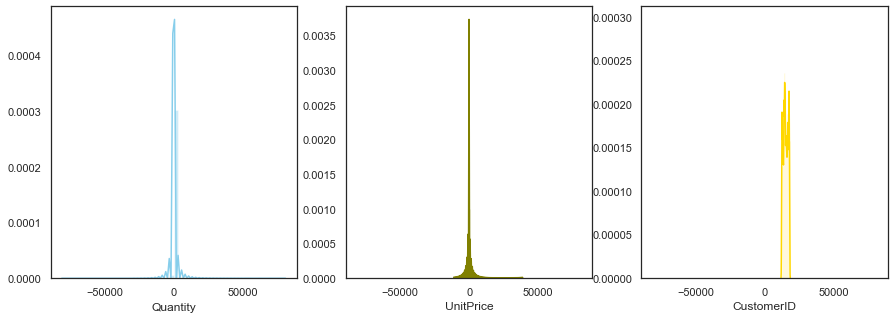

In [640]:
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
sns.distplot( Data["Quantity"] , color="skyblue", ax=axes[0])
sns.distplot( Data["UnitPrice"] , color="olive", ax=axes[1])
sns.distplot( Data["CustomerID"] , color="gold", ax=axes[2])
plt.show()

### Aggregation for all numerical Columns

In [641]:
numeric.describe(include="all")

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

### Unique Values across all column

In [642]:
Data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

### Duplicate values across all columns

In [643]:
Data[Data.duplicated(keep=False)]

InvoiceNo StockCode                       Description  Quantity  \
485       536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
494       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
521       536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
...          ...       ...                               ...       ...   
541675    581538     22068       BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318    BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992            REVOLVER WOODEN RULER          1   
541699    581538     22694                      WICKER STAR          1   
541701    581538     23343      JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
485     12/1/2010 11:45       4.95     17908.0  United Kingdom  
489     12/1/2010 11:45       2.10     17908.0  United Kingdom  
494     12/1/2010 11:45       1.25     17908.0  United Kingdom  
517     12/1/2010 11:45       1.25     17908.0  United Kingdom  
521     12/1/2010 11:45       2.95     17908.0  United Kingdom  
...                 ...        ...         ...             ...  
541675  12/9/2011 11:34       0.39     14446.0  United Kingdom  
541689  12/9/2011 11:34       2.49     14446.0  United Kingdom  
541692  12/9/2011 11:34       1.95     14446.0  United Kingdom  
541699  12/9/2011 11:34       2.10     14446.0  United Kingdom  
541701  12/9/2011 11:34       2.08     14446.0  United Kingdom  

[10147 rows x 8 columns]

### Correlation – Heatmap

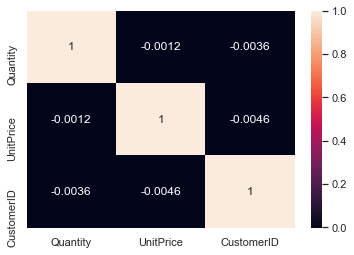

In [644]:
sns.heatmap(Data.corr(), annot=True)
plt.show()

### Regression Plot

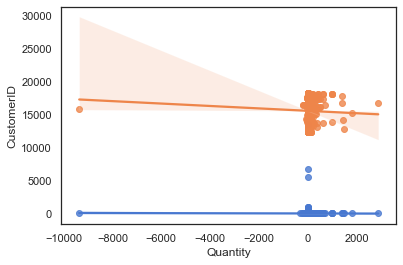

In [645]:
sns.regplot(x="Quantity", y="UnitPrice", data=Data[:20000])
sns.regplot(x="Quantity", y="CustomerID", data=Data[:20000])
plt.show()

### Bar Plot – Every Categorical Variable vs every Numerical Variable 

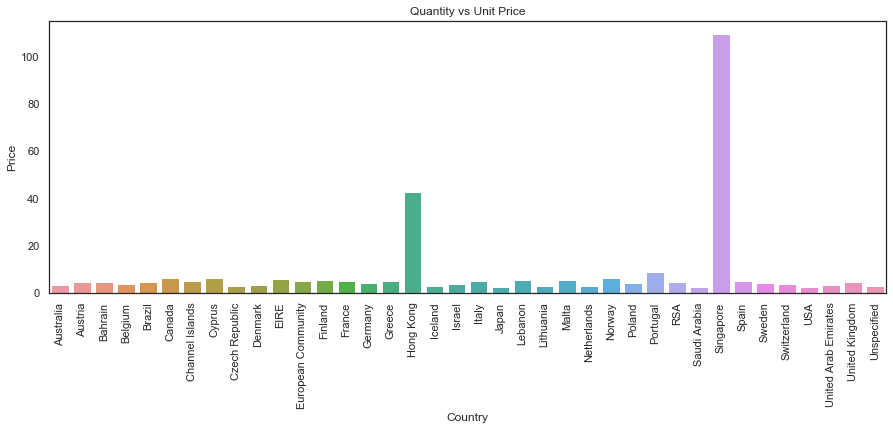

In [646]:
plt.figure(figsize = (15,5))
price = Data.groupby('Country').UnitPrice.mean()
x = price.index.tolist()
y = price.values.tolist()
chart = sns.barplot(x ,y ,data = Data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set(xlabel='Country', ylabel='Price', title='Quantity vs Unit Price')
plt.show()

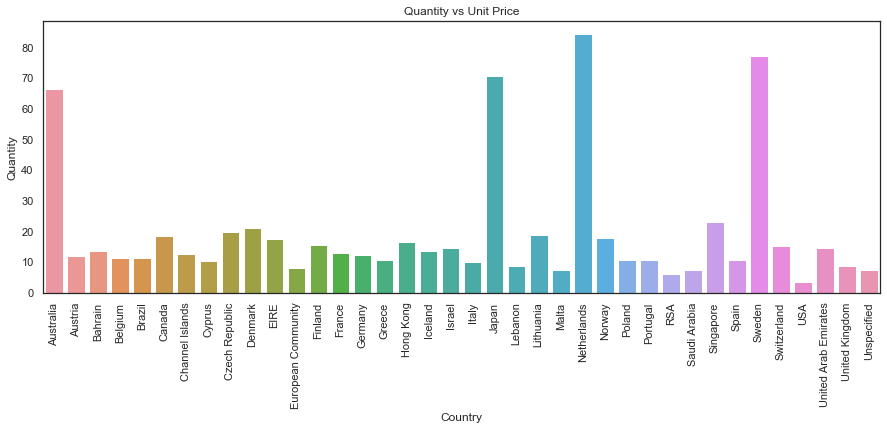

In [647]:
plt.figure(figsize = (15,5))
price1 = Data.groupby('Country').Quantity.mean()
x = price1.index.tolist()
y = price1.values.tolist()
chart = sns.barplot(x ,y ,data = Data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set(xlabel='Country', ylabel='Quantity', title='Quantity vs Unit Price')
plt.show()

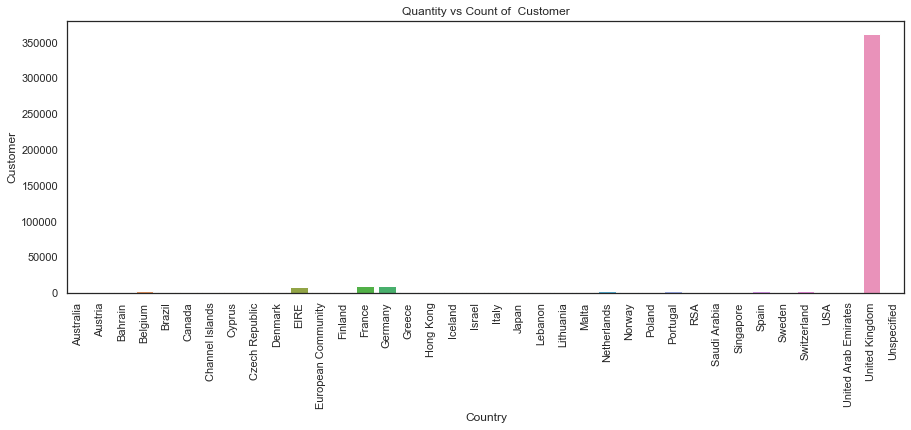

In [648]:
plt.figure(figsize = (15,5))
price2 = Data.groupby('Country').CustomerID.count()
x = price2.index.tolist()
y = price2.values.tolist()
chart = sns.barplot(x ,y ,data = Data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set(xlabel='Country', ylabel='Customer', title='Quantity vs Count of  Customer')
plt.show()

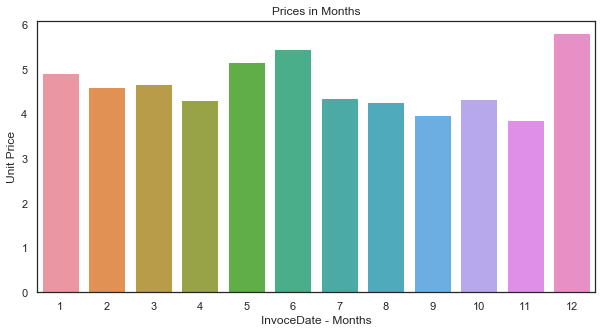

In [649]:
plt.figure(figsize = (10,5))
Data['Date'] = pd.to_datetime(Data['InvoiceDate'])
Data['Month'] = Data['Date'].dt.month
price2 = Data.groupby('Month').UnitPrice.mean()
x = price2.index.tolist()
y = price2.values.tolist()
chart = sns.barplot(x ,y ,data = Data)
chart.set(xlabel='InvoceDate - Months', ylabel='Unit Price', title='Prices in Months')
plt.show()

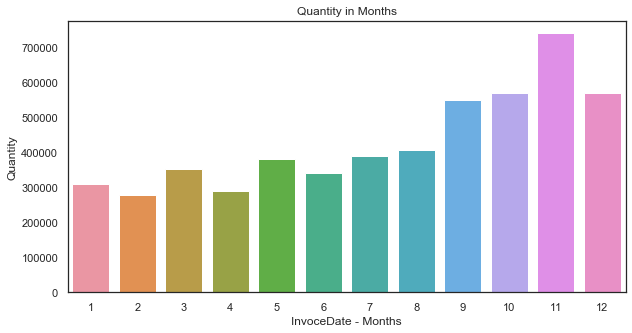

In [650]:
plt.figure(figsize = (10,5))
Data['Date'] = pd.to_datetime(Data['InvoiceDate'])
Data['Month'] = Data['Date'].dt.month
price2 = Data.groupby('Month').Quantity.sum()
x = price2.index.tolist()
y = price2.values.tolist()
chart = sns.barplot(x ,y ,data = Data)
chart.set(xlabel='InvoceDate - Months', ylabel='Quantity', title='Quantity in Months')
plt.show()

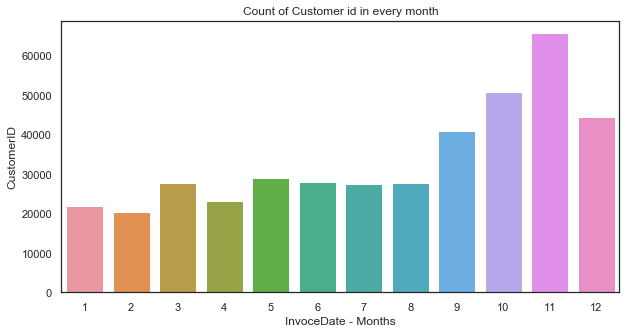

In [651]:
plt.figure(figsize = (10,5))
Data['Date'] = pd.to_datetime(Data['InvoiceDate'])
Data['Month'] = Data['Date'].dt.month
price2 = Data.groupby('Month').CustomerID.count()
x = price2.index.tolist()
y = price2.values.tolist()
chart = sns.barplot(x ,y ,data = Data)
chart.set(xlabel='InvoceDate - Months', ylabel='CustomerID', title='Count of Customer id in every month')
plt.show()

### Pair plot - All Numeric Variables 

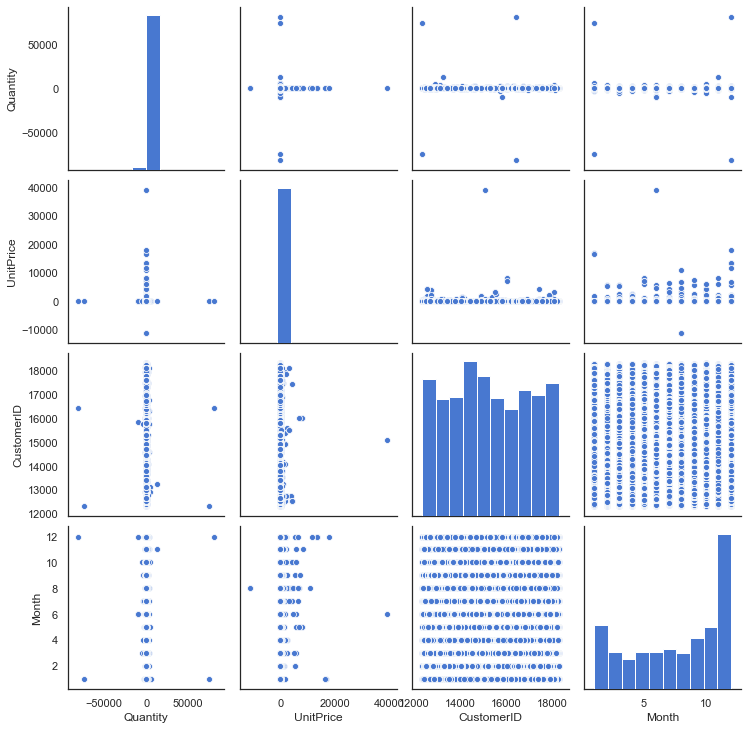

In [652]:
sns.pairplot(Data)
plt.show()

### Line chart to show the trend of data 

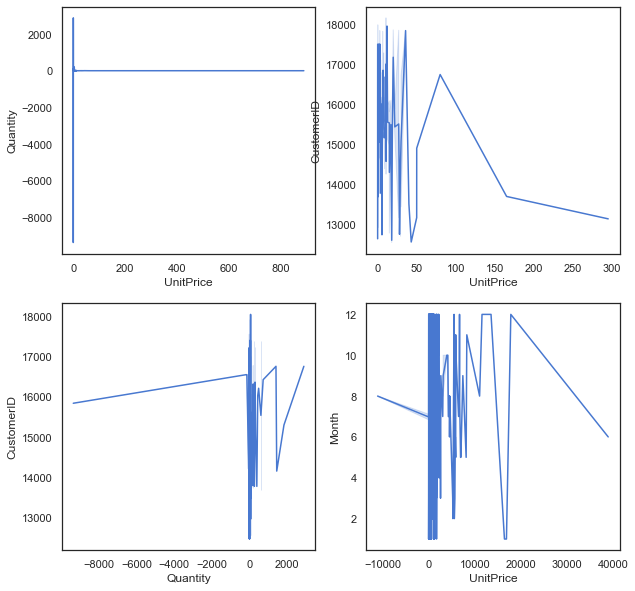

In [653]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
sns.lineplot(x = "UnitPrice" , y= "Quantity",data = Data[:10000], ax = ax[0,0] )
sns.lineplot(x = "UnitPrice" , y= "CustomerID",data = Data[:10000],ax = ax[0,1] )
sns.lineplot(x = "Quantity" , y= "CustomerID",data = Data[:10000],ax = ax[1,0] )
sns.lineplot(x = "UnitPrice" , y= "Month",data = Data,ax = ax[1,1] )
plt.show()

### Plot the skewness

In [654]:
Data.skew(axis = 0, skipna = True)

Quantity       -0.264076
UnitPrice     186.506972
CustomerID      0.029835
Month          -0.414813
dtype: float64

### Treating missing values

In [655]:
Data.shape

(541909, 10)

In [656]:
print("Total null values", Data.isnull().sum().sum())
Data.isnull().sum()

Total null values 136534


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Date                0
Month               0
dtype: int64

In [657]:
value = str(Data["Description"].mode())
Data["Description"].fillna(value = value, inplace = True)
Data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Date                0
Month               0
dtype: int64

In [658]:
Data["CustomerID"].describe()

count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64

In [659]:
value1 = Data["CustomerID"].mode()[0]
Data["CustomerID"].fillna(value = value1, inplace = True)
Data.isnull().sum().sum()

0

### Remove duplicate rows 

In [660]:
print(Data.shape)
Data.drop_duplicates()
print(Data.shape)

(541909, 10)
(541909, 10)


### Remove rows which have negative values in Quantity column

In [661]:
print(Data.shape)
Data.drop(Data[Data.Quantity <0 ].index, inplace = True)
print(Data.shape)

(541909, 10)
(531285, 10)


### Adding the columns

In [662]:
#  Month, Day and Hour
Data['Day'] = Data['Date'].dt.day
Data['Hour'] = Data['Date'].dt.hour
Data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country                Date  \
0  12/1/2010 8:26       2.55     17850.0  United Kingdom 2010-12-01 08:26:00   
1  12/1/2010 8:26       3.39     17850.0  United Kingdom 2010-12-01 08:26:00   
2  12/1/2010 8:26       2.75     17850.0  United Kingdom 2010-12-01 08:26:00   
3  12/1/2010 8:26       3.39     17850.0  United Kingdom 2010-12-01 08:26:00   
4  12/1/2010 8:26       3.39     17850.0  United Kingdom 2010-12-01 08:26:00   

   Month  Day  Hour  
0     12    1     8  
1     12    1     8  
2     12    1     8  
3     12    1     8  
4     12    1     8

### How many orders made by the customers?

In [663]:
Orders= Data.groupby("InvoiceNo").InvoiceNo.count()
print(Orders.unique().sum())
Orders

85958


InvoiceNo
536365      7
536366      2
536367     12
536368      4
536369      1
           ..
581586      4
581587     15
A563185     1
A563186     1
A563187     1
Name: InvoiceNo, Length: 20728, dtype: int64

### TOP 5 customers with higher number of orders 

In [664]:
Data.groupby("CustomerID").InvoiceNo.count().nlargest(5)

CustomerID
17841.0    141208
14911.0      5677
14096.0      5111
12748.0      4596
14606.0      2700
Name: InvoiceNo, dtype: int64

### How much money spent by the customers? 

In [665]:
Data["spent"] = Data.Quantity*Data.UnitPrice
spent.sum()

10619986.684

### TOP 5 customers with highest money spent 

In [666]:
Data.groupby(["CustomerID"]).spent.sum().nlargest(5)

CustomerID
17841.0    1.774144e+06
14646.0    2.802060e+05
18102.0    2.596573e+05
17450.0    1.945508e+05
16446.0    1.684725e+05
Name: spent, dtype: float64

### How many orders per month?

Month
1     34350
2     27184
3     35915
4     29171
5     36292
6     36056
7     38716
8     34566
9     49323
10    59396
11    83498
12    66818
Name: InvoiceNo, dtype: int64


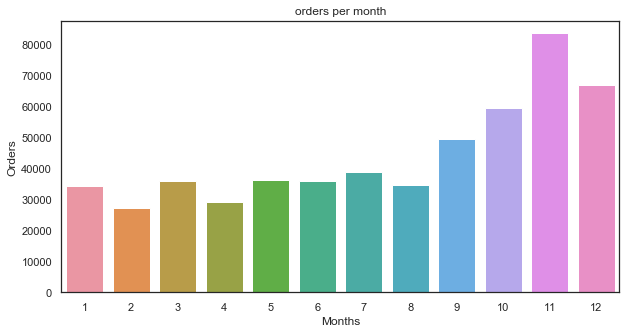

In [667]:
plt.figure(figsize=(10,5))
Order_per_month = Data.groupby("Month").InvoiceNo.count()
x = Order_per_month.index.tolist()
y = Order_per_month.values.tolist()
print(Order_per_month)
sns.barplot(x = x, y=y, data = Data).set(xlabel='Months', ylabel='Orders', title='orders per month')
plt.show()

### How many orders per day?

Day
1     17179
2     16412
3     14200
4     19275
5     21749
6     23518
7     22526
8     24172
9     17813
10    19476
11    18043
12    13761
13    18015
14    17643
15    15467
16    15395
17    22548
18    18684
19    12879
20    18867
21    18738
22    15908
23    17504
24    16500
25    15970
26    10337
27    14679
28    16872
29    11767
30    15190
31    10198
Name: InvoiceNo, dtype: int64


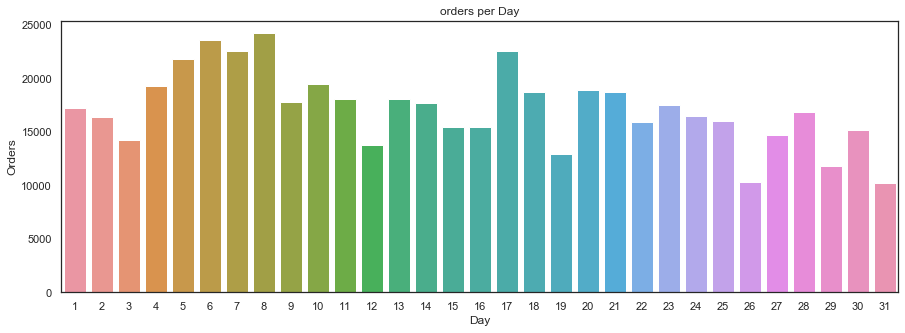

In [668]:
plt.figure(figsize=(15,5))
Order_per_day = Data.groupby("Day").InvoiceNo.count()
x = Order_per_day.index.tolist()
y = Order_per_day.values.tolist()
print(Order_per_day)
sns.barplot(x = x, y=y, data = Data).set(xlabel='Day', ylabel='Orders', title='orders per Day')
plt.show()

### How many orders per hour?

Hour
6         1
7       379
8      8805
9     33755
10    47895
11    56312
12    77230
13    71075
14    66268
15    76432
16    53451
17    27635
18     7729
19     3516
20      802
Name: InvoiceNo, dtype: int64


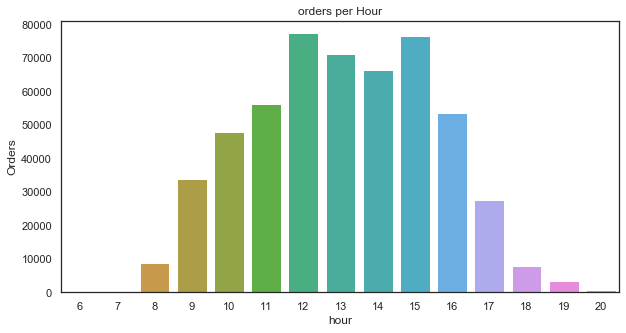

In [669]:
plt.figure(figsize=(10,5))
Order_per_hour = Data.groupby("Hour").InvoiceNo.count()
x = Order_per_hour.index.tolist()
y = Order_per_hour.values.tolist()
print(Order_per_hour)
sns.barplot(x = x, y=y, data = Data).set(xlabel='hour', ylabel='Orders', title='orders per Hour')
plt.show()

### How many orders for each country?

Country
Australia                 1185
Austria                    398
Bahrain                     18
Belgium                   2031
Brazil                      32
Canada                     151
Channel Islands            748
Cyprus                     614
Czech Republic              25
Denmark                    380
EIRE                      7894
European Community          60
Finland                    685
France                    8408
Germany                   9042
Greece                     145
Hong Kong                  284
Iceland                    182
Israel                     295
Italy                      758
Japan                      321
Lebanon                     45
Lithuania                   35
Malta                      112
Netherlands               2363
Norway                    1072
Poland                     330
Portugal                  1501
RSA                         58
Saudi Arabia                 9
Singapore                  222
Spain                     2485


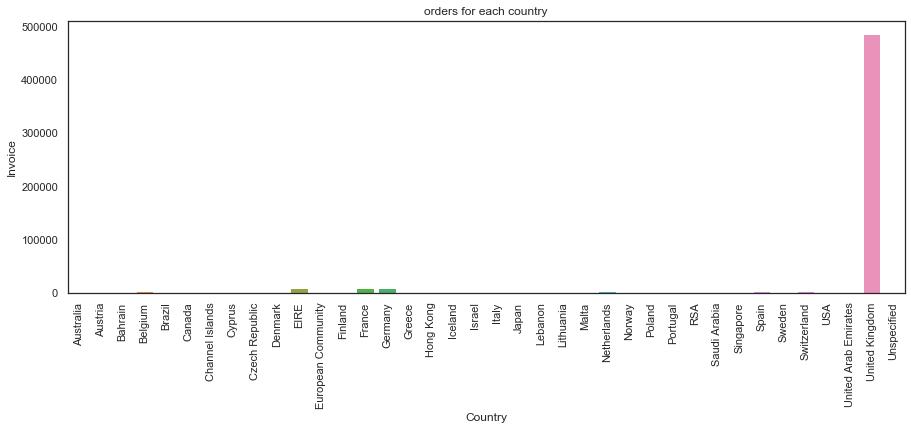

In [670]:
plt.figure(figsize=(15,5))
Order_per_country = Data.groupby("Country").InvoiceNo.count()
x = Order_per_country.index.tolist()
y = Order_per_country.values.tolist()
print(Order_per_country)
chart = sns.barplot(x ,y ,data = Data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set(xlabel='Country', ylabel='Invoice', title='orders for each country')
plt.show()

### Orders trend across months 

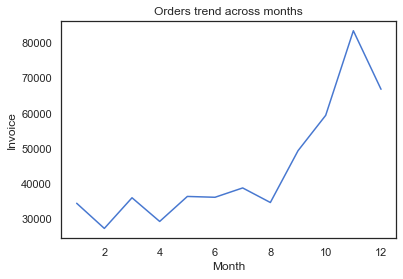

In [671]:
Data.groupby(["Month"]).InvoiceNo.count().plot(kind = 'line')
plt.xlabel("Month")
plt.ylabel("Invoice")
plt.title("Orders trend across months")
plt.show()

### How much money spent by each country? 

Country
Australia               1.385213e+05
Austria                 1.019868e+04
Bahrain                 7.541400e+02
Belgium                 4.119634e+04
Brazil                  1.143600e+03
Canada                  3.666380e+03
Channel Islands         2.045044e+04
Cyprus                  1.359038e+04
Czech Republic          8.267400e+02
Denmark                 1.895534e+04
EIRE                    2.834540e+05
European Community      1.300250e+03
Finland                 2.254608e+04
France                  2.097151e+05
Germany                 2.288671e+05
Greece                  4.760520e+03
Hong Kong               1.569180e+04
Iceland                 4.310000e+03
Israel                  8.135260e+03
Italy                   1.748324e+04
Japan                   3.741637e+04
Lebanon                 1.693880e+03
Lithuania               1.661060e+03
Malta                   2.725590e+03
Netherlands             2.854463e+05
Norway                  3.616544e+04
Poland                  7.3346

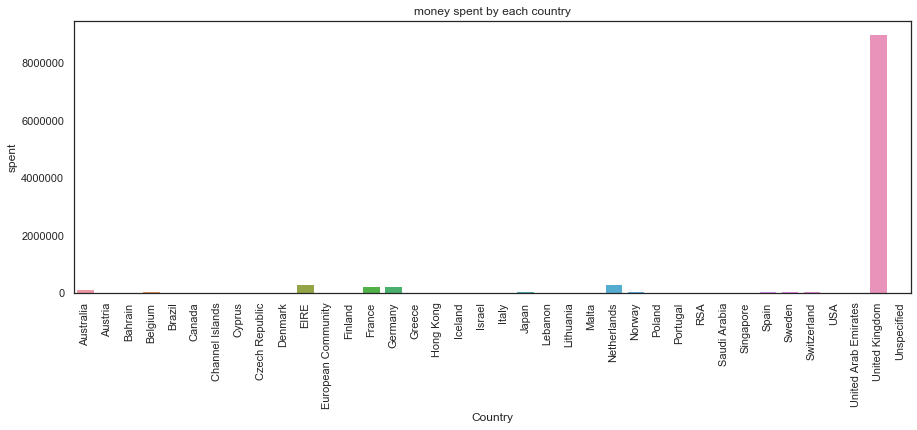

In [673]:
plt.figure(figsize=(15,5))
Money_per_country = Data.groupby("Country").spent.sum()
x = Money_per_country.index.tolist()
y = Money_per_country.values.tolist()
print(Money_per_country)
chart = sns.barplot(x ,y ,data = Data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set(xlabel='Country', ylabel='spent', title='money spent by each country')
plt.show()